In [1]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_hcn/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_hc.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_hc.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_hc.npy"), S_var)

In [2]:
for L in [6,7,8,9]:
    for T in [10.0*L]:
        for p in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            for d in ["Z2"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,500,10*L)

In [3]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Evar_L8,T80.0,dt1.0,p0.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_8
Moved Evar_L8,T80.0,dt1.0,p1.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_8
Moved Emean_L7,T70.0,dt1.0,p0.4_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_7
Moved Emean_L7,T70.0,dt1.0,p0.8_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_7
Moved Evar_L6,T60.0,dt1.0,p0.9_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_6
Moved Evar_L6,T60.0,dt1.0,p0.5_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_6
Moved Emean_L9,T90.0,dt1.0,p0.1_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_9
Moved Emean_L8,T80.0,dt1.0,p0.4_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_8
Moved Evar_L7,T70.0,dt1.0,p0.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_7
Moved Evar_L7,T70.0,dt1.0,p1.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_7
Moved Emean_L8,T80.0,dt1.0,p0.8_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcn/L_8
Moved Evar_L9,T90.0,dt1.0,p

In [4]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# List of L values
L_list = [6, 7, 8, 9, 10, 11]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Moved Evar_L6,T60.0,dt1.0,p0.9_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.5_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.7_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.3_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.1_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.8_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.4_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.6_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.2_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p1.0_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcn/L_6/var
Moved Evar_L6,T60.0,dt1.0,p0.0_hc.npy to /Users/uditvarma/Documents/s3

In [5]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# List of L values you want to process
L_values = [5, 6, 7, 8, 9]

# Loop through each L value
for L in L_values:
    # Create the directory path dynamically based on L
    data_dir = os.path.join(base_dir, f'L_{L}')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the first data points
    last_data_points = []

    # Loop through the files and collect the first data point
    for file_name in file_list:
        data = np.load(os.path.join(data_dir, file_name))
        last_data_points.append(data[-1])  # Collect first data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Directory for L=5 not found: /Users/uditvarma/Documents/s3_data/mean_hcn/L_5
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L7.npy
Data for L=8 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L8.npy
Data for L=9 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L9.npy


# Plots

In [6]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# List of L values you want to process
L_values = [6, 7, 8, 9]

# Loop through each L value
for L in L_values:
    # Path to the "var" subdirectory inside each L folder
    data_dir = os.path.join(base_dir, f'L_{L}', 'var')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the "var" directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the last data points
    last_data_points = []

    # Loop through the files and collect the last data point
    for file_name in file_list:
        file_path = os.path.join(data_dir, file_name)
        data = np.load(file_path)
        last_data_points.append(data[-1])  # Collect last data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L_var{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var7.npy
Data for L=8 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var8.npy
Data for L=9 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var9.npy


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8, 9]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hcn'
filename_template = 'timeT_points_L_var{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Variance of S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc_var(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/uditvarma/Documents/s3/plots/19 Sep 2025/S_hc_var_vs_p_Z2.svg')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var6.npy'

<Figure size 800x500 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8, 9]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hcn'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Half-chain entropy vs p')
plt.xlabel('p')
plt.ylabel('S_hc(t=10L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/uditvarma/Documents/s3/plots/19 Sep 2025/S_hc_vs_p_Z2.svg')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L6.npy'

<Figure size 800x500 with 0 Axes>

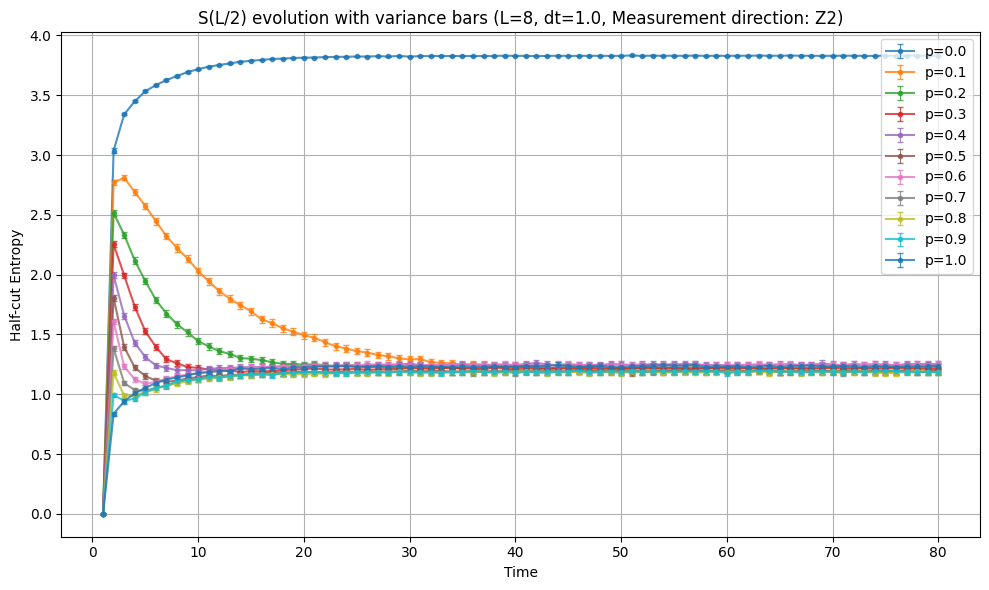

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-cut Entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig("/Users/uditvarma/Documents/s3/plots/19 Sep 2025/S_hc_8_vs_t_Z2.svg")
plt.show()

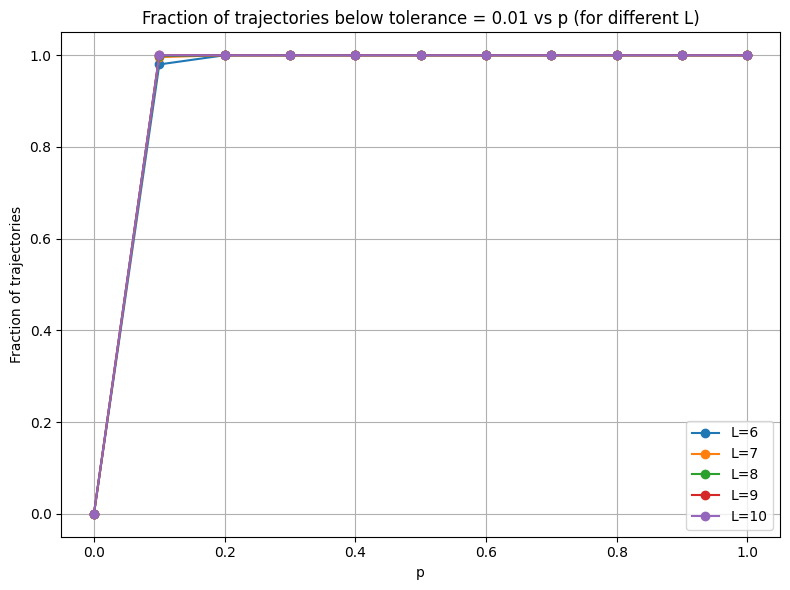

<Figure size 640x480 with 0 Axes>

In [16]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnvn"

# Set tolerance
tolerance = 0.01  # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel("Fraction of trajectories")
plt.title(f"Fraction of trajectories below tolerance = {tolerance} vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("/Users/uditvarma/Documents/s3/plots/19 Sep 2025/N_vs_p_Z2.svg")